In [3]:
from fisher import Fisher
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.figsize'] = [10, 5]

In [4]:
ells_sample_file = "cache/_M/4000_1000/ells.npy"
M_file = "cache/_M/4000_1000/M.npy"

In [5]:
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2)

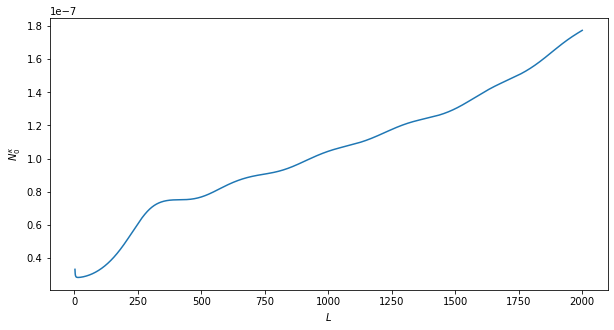

In [6]:
ellmax = 2000
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [10]:
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file)

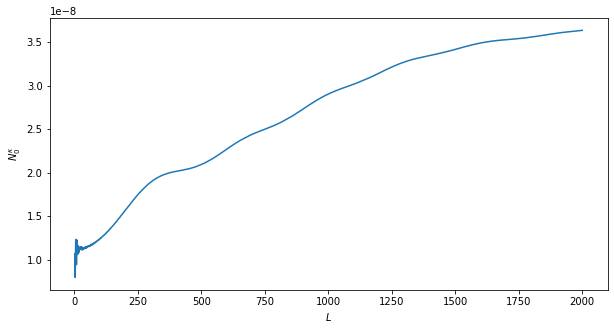

In [11]:
N0_kappa = fisher.noise.get_N0("phi", ellmax, tidy=True, ell_factors=True)
ells = np.arange(ellmax + 1)
plt.figure()
plt.plot(ells[2:], N0_kappa[2:])
plt.xlabel("$L$")
plt.ylabel("$N_0^{\kappa}$")
plt.show()

In [12]:
Lmax = 4000
dL = 10
Ntheta = 10
f_sky = 0.4
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("No foreground")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground
S/N = 1.504787144056077
---------------------------
Time = 7.8539137840271


In [26]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("baseline")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")


baseline
S/N = 0.499640494630238
---------------------------
Time = 7.89377498626709


In [27]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_it_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("baseline + it")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

baseline + it
S/N = 0.5052422929670991
---------------------------
Time = 7.805883169174194


In [28]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky)
print("goal + it")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

goal + it
S/N = 0.7472315964371433
---------------------------
Time = 7.965595245361328


In [29]:
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("No foreground + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground + one N_k
S/N = 2.034106264350092
---------------------------
Time = 7.925270080566406


In [31]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("baseline + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

baseline + one N_k
S/N = 0.8134710165325555
---------------------------
Time = 7.912077188491821


In [32]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="one")
print("goal + it + one N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

goal + it + one N_k
S/N = 1.1075304224751195
---------------------------
Time = 7.937839031219482


In [41]:
t0 = time.time()
N0_file = "cache/_N0/N0_my_SO_14_14_TQU.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("No foreground + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

No foreground + no N_k
S/N = 2.793309745185178
---------------------------
Time = 7.800961017608643


In [37]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("baseline + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

baseline + no N_k
S/N = 1.2565557439609265
---------------------------
Time = 7.833463907241821


In [38]:
t0 = time.time()
N0_file = "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"
fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Lmax, dL, Ntheta=Ntheta, f_sky=f_sky, include_N0_kappa="none")
print("goal + it + no N_k")
print(f"S/N = {np.sqrt(F_conv_rot)}")
print("---------------------------")
t1 = time.time()
print(f"Time = {t1 - t0}")

goal + it + no N_k
S/N = 1.5860798230857782
---------------------------
Time = 7.903465032577515


In [15]:
def get_Ls_sample(ellmax, Nells):    
    part1 = 200
    part2 = 1500
    if ellmax <= part1:
        return np.linspace(2, part1, Nells)
    if ellmax <= part2:
        ells_part1 = np.linspace(2, part1, Nells // 2)
        Nells_remaining = Nells - np.size(ells_part1)
        ells_remaining = np.linspace(part1 + 1, ellmax, Nells_remaining)
        return np.concatenate((ells_part1, ells_remaining))
    ells_part1 = np.linspace(2, part1, Nells//3)
    ells_part2 = np.linspace(part1 + 1, part2, Nells//3)
    Nells_remaining = Nells - np.size(ells_part1) - np.size(ells_part2)
    ells_remaining = np.linspace(part2 + 1, ellmax, Nells_remaining)
    return np.concatenate((ells_part1, ells_part2, ells_remaining)).astype("double")

149.6
586.7636363636364
988.2727272727273
120.8
216.74545454545455
925.2909090909092
125.6
216.74545454545455
838.6909090909091
95.95999574661255


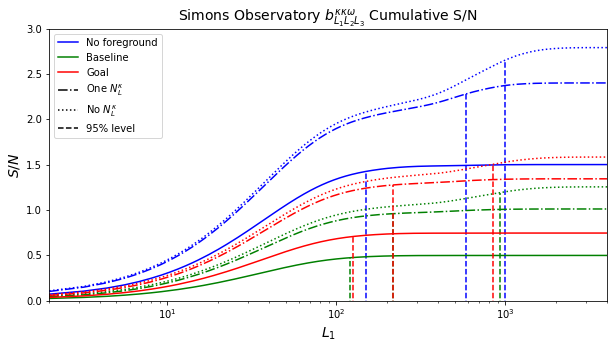

In [32]:
Nells = 500
level = 0.95
colors = ["blue", "green", "red"]
N0_files = ["cache/_N0/N0_my_SO_14_14_TQU.npy", "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["No foreground", "Baseline", "Goal"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
offsets = [0,2,2]
N0_ell_factors = [True, False, False] 
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=offsets[iii], N0_ell_factors=N0_ell_factors[iii])
        Ls = get_Ls_sample(Lmax, Nells)
        F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Simons Observatory $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 3)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()

120.8
216.74545454545455
925.2909090909092
125.6
216.74545454545455
838.6909090909091
64.38198924064636


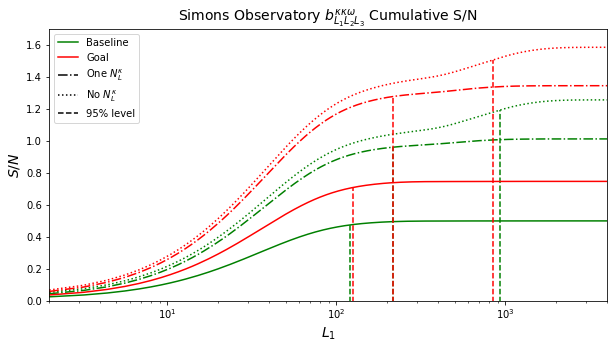

In [33]:
Nells = 500
level = 0.95
colors = ["green", "red"]
N0_files = [ "cache/_N0/N0_foreground_SO_all_base_qe_MV.npy", "cache/_N0/N0_foreground_SO_all_goal_it_MV.npy"]
labels = ["Baseline", "Goal"]
linestyles = ["-", "dashdot", "dotted"]
include_N0_kappas = ["both", "one", "none"]
t0 = time.time()
for iii, N0_file in enumerate(N0_files):
    for jjj, include_N0_kappa in enumerate(include_N0_kappas):
        fisher = Fisher(ells_sample_file, M_file, N0_file, N0_offset=2, N0_ell_factors=False)
        Ls = get_Ls_sample(Lmax, Nells)
        F_conv_rot = fisher.get_convergence_rotation_bispectrum_Fisher(Ls=Ls, Ntheta=Ntheta, f_sky=f_sky, arr=True, include_N0_kappa=include_N0_kappa)
        SNs = np.sqrt(np.cumsum(F_conv_rot))
        if jjj == 0:
            plt.semilogx(Ls, SNs, label=labels[iii], color=colors[iii], linestyle=linestyles[jjj])
        else:
            plt.semilogx(Ls, SNs, color=colors[iii], linestyle=linestyles[jjj])
        SN = SNs[-1]
        L_level = Ls[SNs < level*SN][-1]
        print(L_level)
        L_level_index = np.where(Ls==L_level)[0][0]
        L_levels = np.array([L_level, L_level])
        SN_levels = np.array([-0.5, SNs[L_level_index]])
        plt.plot(L_levels, SN_levels, color=colors[iii], linestyle="--")
t1 = time.time()
print(t1-t0)
plt.title("Simons Observatory $b_{L_1L_2L_3}^{\kappa\kappa\omega}$ Cumulative S/N", fontsize=14)
plt.xlabel("$L_1$", fontsize=14)
plt.ylabel("$S/N$", fontsize=14)
plt.plot([1e10], [1e10], label="One $N_L^{\kappa}$", linestyle="dashdot", color="k")
plt.plot([1e10], [1e10], label="No $N_L^{\kappa}$", linestyle="dotted", color="k")
plt.plot([1e10], [1e10], label="95% level", linestyle="--", color="k")
plt.ylim(0, 1.7)
plt.xlim(2e0, 4e3)
plt.legend()
plt.show()